In [16]:
seq="TAAACGTGAGAGAAACGTGCTGATTACACTTGTTCGTGTGGTAT"
def FrequencyMap(Text, k):
    freq = {}
    n = len(Text)
    for i in range(n-k+1):
        Pattern = Text[i:i+k]
        freq[Pattern] = 0
        for i in range(n-k+1):
            if Text[i:i+k] == Pattern:
                freq[Pattern] += 1
    return freq

dict_freq=FrequencyMap(seq, 3)

In [17]:
max(dict_freq.values())

4

In [21]:
def FrequentWords(Text, k):
    
    words = []
    freq = FrequencyMap(Text, k)
    m = max(freq.values())
    for key in freq:
    # add each key to words whose corresponding frequency value is equal to m
        if freq.get(key) == m:
            words.append(key)
    return words,m

Text = "ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC"
k = 10
FrequentWords(Text,10)

(['CTCTTGATCA', 'TCTTGATCAT'], 3)

In [23]:
def ReverseComplement(Pattern):
    Pattern = Reverse(Pattern) # reverse all letters in a string
    Pattern = Complement(Pattern) # complement each letter in a string
    return Pattern

# Input:  A string Pattern
# Output: The reverse of Pattern
def Reverse(Pattern):
  reversed_Pattern=Pattern[::-1]
  return reversed_Pattern

Pattern = "AAAACCCGGT"

print(Reverse(Pattern))

TGGCCCAAAA


In [26]:
def Complement(Pattern):
    basepairs = {"A":"T", "G":"C", "T":"A", "C":"G"}
    
    return ''.join(basepairs[i] for i in Pattern)

print(Complement(Pattern))

TTTTGGGCCA


In [25]:
print(ReverseComplement(Pattern))

ACCGGGTTTT


In [32]:
def PatternMatching(Pattern, Genome):
    positions = [] # output variable
    for i in range(len(Genome)-len(Pattern)+1):
        if Genome[i:i+len(Pattern)] == Pattern:
            positions.append(i)
    # your code here
    return positions

import sys                              # needed to read the genome
input = sys.stdin.read().splitlines()   #
v_cholerae = input[1]
#this is not working. v_cholerae = !wget --no-check http://bioinformaticsalgorithms.com/data/realdatasets/Replication/Vibrio_cholerae.txt
positions=[]
# Call PatternMatching with Pattern equal to "CTTGATCAT" and Genome equal to v_cholerae,
# and store the output as a variable called positions
positions = PatternMatching("CTTGATCAT",v_cholerae)

# print the positions variable
print (positions)    

[]


In [36]:
v_cholerae =!wget --no-check http://bioinformaticsalgorithms.com/data/realdatasets/Replication/Vibrio_cholerae.txt    

In [37]:
#This is inefficient algorithm, will crash system if used on a genome! Use the FasterSymbolArray given below
def SymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2]
    for i in range(n):
        array[i] = PatternCount(symbol, ExtendedGenome[i:i+(n//2)])
    return array

In [40]:
def PatternCount(Pattern, Text):
    count = 0
    for i in range(len(Text)-len(Pattern)+1):
        if Text[i:i+len(Pattern)] == Pattern:
            count = count+1
    return count

print (SymbolArray('AAAAGGGG', 'A'))

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}


In [41]:
#More efficient algorithm, however works correct only if symbol is one character long, won't work correctly for >1 pattern/symbol
def FasterSymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2]

    # look at the first half of Genome to compute first array value
    array[0] = PatternCount(symbol, Genome[0:n//2])

    for i in range(1, n):
        # start by setting the current array value equal to the previous array value
        array[i] = array[i-1]

        # the current array value can differ from the previous array value by at most 1
        if ExtendedGenome[i-1] == symbol:
            array[i] = array[i]-1
        if ExtendedGenome[i+(n//2)-1] == symbol:
            array[i] = array[i]+1
    return array

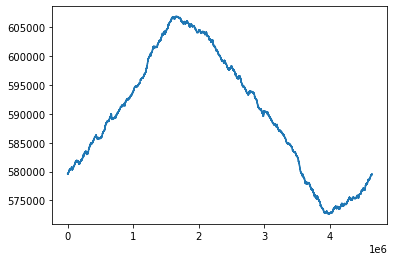

In [50]:
with open('C:/Users/myPC/Desktop/E_coli.txt') as file:
    e_coli = file.read();

array = FasterSymbolArray(e_coli, "C")

import matplotlib.pyplot as plt
plt.plot(array.values())
plt.show()

In [82]:
def SkewArray(Genome):
    skew = [0]
    score = {"A":0, "T":0, "C":-1, "G":1}
    for i in range(1,len(Genome)+1):
            skew.append(score[Genome[i-1]] + skew[i-1]        
    
    return skew

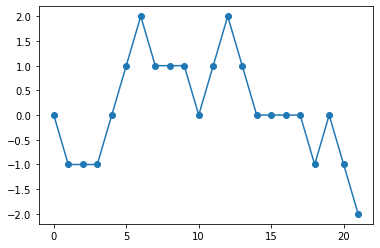

None


In [83]:
print (SkewArray('CATGGGCATCGGCCATACGCC'))

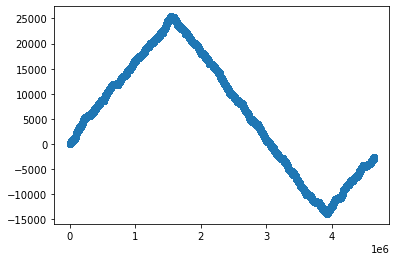

ValueError: x, y, and format string must not be None

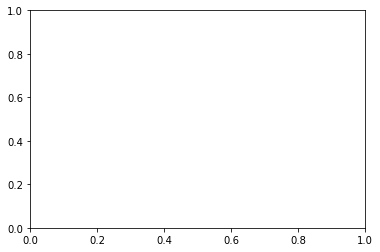

In [92]:
import matplotlib.pyplot as plt
with open('C:/Users/myPC/Desktop/E_coli.txt') as file:
    genome = file.read()
    skew = SkewArray(genome)
    plt.plot(skew)

In [100]:
# Input:  A DNA string Genome
# Output: A list containing all integers i minimizing Skew(Prefix_i(Text)) over all values of i (from 0 to |Genome|)
def MinimumSkew(Genome):
     # your code here
    Positions = []  # output variable
    Array = SkewArray(Genome)
    m = min(Array)
    for i in range(len(Array)):
        if Array[i] == m:
            Positions.append(i)
    return Positions

def SkewArray(Genome):
    Array = [0]
    BaseValue = { 'C' : -1, 'G' : 1, 'A' : 0, 'T' : 0 }
    for i in range(len(Genome)):
        Array.insert(i+1, BaseValue.get(Genome[i])+Array[i])
    return Array
 
# Input:  A String Genome
# Output: SkewArray(Genome)
print(MinimumSkew("GATACACTTCCCGAGTAGGTACTG"))

[12]


In [101]:
def HammingDistance (p, q):
    count = 0
    for i, j in zip(p, q):
       if i != j:
           count += 1
    return count

print(HammingDistance( "CAGAAAGGAAGGTCCCCATACACCGACGCACCAGTTTA", "CACGCCGTATGCATAAACGAGCCGCACGAACCAGAGAG"))

23


In [95]:
def ApproximatePatternMatching(Text, Pattern, d):
    positions = [] # initializing list of positions
    for i in range(len(Text)-len(Pattern)+1):
        if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d:
            positions.append(i)
    return positions
#range is modified like this because if is it just length of the bigger text, pattern will keep sliding along with empty letters, adding more to the list of positions

def HammingDistance(p, q):
    count = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            count += 1
    return count

In [ ]:
def ApproximatePatternCount(Pattern, Text, d):
    count = 0 # initialize count variable
    for i in range(len(Text)-len(Pattern)+1):
        if HammingDistance(Pattern, Text[i:i+len(Pattern)]) <= d:
            count += 1
    return count
#same thing as the pattern matching before, but it is replaced by count

def HammingDistance(p, q):
    count = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            count += 1
    return count

In [96]:
8.7//4

2.0